# 코드 테스트(TDD: Test Driven Development -> 테스트 주도 개발방법론)

함수나 클래스를 만들면 그 코드를 테스트 할 수 있습니다. 테스트를 통해 코드가 받도록 디자인된 모든 입력 타입에 응답한다고 확신할 수 있습니다. 더 많은 사람들이 프로그램을 사용해도 코드가 정확히 동작한다고 확신할 수 있습니다. 새코드를 테스트해서 프로그램에 추가해도 기존 동작을 망치지 않게 할 수 있습니다. 모든 프로그래머는 실수를 합니다. 따라서 프로그래머는 반드시 코드를 자주 테스트해서 사용자에게 문제가 생기지 않게 해야 합니다. 

파이썬의 unittest 모듈에 포함된 도구를 써서 코드를 테스트하는 법을 배웁니다. 테스트 케이스를 만들고 입력에 따른 출력 결과가 당신이 원하던 결과가 맞는지 체크하는 법을 배웁니다. 

## 함수 테스트

테스트에 대해 배우기 위해서는 테스트할 코드가 필요합니다. 아래 프로그램은 성과 이름을 받아 읽기 좋은 전체 이름을 반환하는 단순한 함수입니다. 

In [8]:
# def get_formatted_name(first, last): 
#     """풀네임을 생성해서 반환합니다."""
#     full_name = f"{first} {last}"
#     return full_name.title()

In [1]:
from name_function import get_formatted_name

print("Enter 'q' at any time to quit.")
while True:
    first = input("\nPlease give me a first name: ")
    if first == 'q':
        break
    last = input("\nPlease give me a last name: ")
    if last == 'q':
        break

    formatted_name = get_formatted_name(first, last)
    print(f"\tNeatly formatted name: {formatted_name}.")

Enter 'q' at any time to quit.



Please give me a first name:  q


get_formatted_name() 함수는 성과 이름 사이에 공백을 넣고 결합해 전체 이름을 만든 다음, 단어의 첫 글자를 대문자로 바꿔 풀네임을 반환합니다. 일단 get_formatted_name()을 사용하는 프로그램을 만들어 동작을 체크합니다. 

### 통과하는 테스트
함수의 테스트 케이스를 만들어서 함수에 필요한 단위 테스트를 추가해야 합니다. 함수의 테스트 케이스를 만들려면 먼저 unittest 모듈과 테스트할 함수를 임포트합니다. 
unittest.TestCase를 상속하는 클래스를 만들고, 함수의 여러 측면을 테스트하는 메서드를 추가합니다.

In [2]:
import name_function_test

In [2]:
%run name_function_test

F
FAIL: test_first_last_name (__main__.NameTestCase.test_first_last_name)
taylor swift 같은 이름이 제대로 동작하는가?
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\name_function_test.py", line 11, in test_first_last_name
    self.assertEqual(formatted_name, 'taylor swift')
AssertionError: 'Wolfgang Mozart Amadeus' != 'taylor swift'
- Wolfgang Mozart Amadeus
+ taylor swift


----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (failures=1)


SystemExit: True

### 실패하는 테스트

실패하는 테스트를 확인해보기 위해서 get_formatted_name()을 수정해서 중간 이름을 처리할 수 있게 하지만 중간이름이 없는 경우에는 에러가 나게 만들어 보겠습니다.

다음의 get_formatted_name()이 매개변수로 중간 이름을 받게 만든 버전입니다.

### 실패한 테스트 점검

테스트가 실패하면 다음과 같은 작업을 수행해야 합니다. 올바른 조건을 체크했다고 가정하면 통과하는 테스트는 함수가 정확히 동작했다는 뜻이고, 실패하는 테스트는 새 코드에 에러가 있다는 뜻입니다. 따라서 테스트가 실패해도 테스트 자체는 수정하지 않습니다. 그 대신 테스트를 실패하게 만든 코드를 수정하여야 합니다. 함수를 어떻게 바꿨는지 점검하고, 어떤 부분이 함수가 원하는 대로 동작하지 않게 만들었는지 찾아내야 합니다.

In [4]:
test_str = "ㅁ"
if test_str:
    print("공백 문자열이 아닙니다.")
else:
    print("공백 문자열입니다.")

공백 문자열이 아닙니다.


In [1]:
%run name_function_test

.F
FAIL: test_first_last_name (__main__.NameTestCase.test_first_last_name)
taylor swift 같은 이름이 제대로 동작하는가?
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\name_function_test.py", line 11, in test_first_last_name
    self.assertEqual(formatted_name, 'taylor swift')
AssertionError: 'Taylor Swift' != 'taylor swift'
- Taylor Swift
? ^      ^
+ taylor swift
? ^      ^


----------------------------------------------------------------------
Ran 2 tests in 0.001s

FAILED (failures=1)


SystemExit: True

first name, middle name last name을 입력하여 제대로 동작하는지 테스트하기 위해서 test_first_last_middle_name() 이라는 테스트 케이스를 추가했습니다. test_name_function.py를 실행할 때 메서드가 자동으로 실행되려면 메서드 이름은 반드시 test_로 시작해야 합니다. get_formatted_name()의 어떤 동작을 테스트하고 있는지 명확히 드러나는 메서드 이름을 정했습니다. 테스트가 실패하면 어떤 종류의 이름에 문제가 생겼는지 유닛테스트를 통해 정확히 알 수 있습니다. 

### 연습문제

도시와 국가: 매개 변수로 도시 이름과 국가 이름을 받는 함수를 만드세요. 이 함수는 도시 국가 Santiago, Chile처럼 도시 , 국가 형태의 문자열 하나를 반환해야 합니다. 이 함수를 city_functions.py 모듈에 저장하세요.

- 지금 만든 함수를 테스트할 test_cities.py 모듈을 만드세요(테스트하려면 unittest와 함수를 임포트해야 합니다.) 'santiago'와 'chile' 같은 값으로 함수를 호출 했을 때 정확한 문자열이 반환되는지 확인할 test_city_country() 메서드를 만드십시오. test_cities.py를 실행하고 test_city_country()통과하는지 확인하세요.

In [2]:
%run test_cities

F
FAIL: test_city_country (__main__.CitiesTestCase.test_city_country)
도시명 국가명이 올바르게 하나의 문자열로 연결되는가?
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\admin\test_cities.py", line 9, in test_city_country
    self.assertEqual(santiago_chile, 'Santiago, chile')
AssertionError: 'Santiago, Chile' != 'Santiago, chile'
- Santiago, Chile
?           ^
+ Santiago, chile
?           ^


----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (failures=1)


SystemExit: True

## 클래스 테스트

여러 프로그램에서 클래스를 사용하므로 작성한 클래스가 정확히 동작하는지 확인할 수 있는게 좋습니다. 사용중인 클래스에 대한 테스트가 통과하면 클래스를 개선하다가 현재 동작이 잘못되지 않을 거라고 확신할 수 있습니다. 

### 다양한 단언(assert) 메서드

파이썬은 unittest.TestCase 클래스에 여러 가지 단언 메서드를 제공합니다. 단언 메시지는 우리가 맞다고 생각하는 조건이 특정 시점에서 정말 맞는지 테스트합니다. 

이들 메서드를 쓰면 반환값이 예상한 값과 일치하는지 아닍, 값이 True 인지 False읹, 값이 어떤 리스트안에 포함되는지(in), 아닌지(not in)를 확인할 수 있습니다. 이들 메서드는 unittest.TestCase를 상속하는 클래스안에서만 사용할 수 있습니다. 



#### unittest 모듈의 단언 메서드들

|메서드|사용 예|
|:-|:-|
|assertEqual(a,b)|a == b 임을 확인합니다.|
|assertNotEqual(a,b)|a != b임을 확인합니다.|
|assertTrue(X)|x가 True임을 확인합니다.|
|assertFalse(X)|X가 False임을 확인합니다.|
|assertIn(item, list)|item이 list안에 있음을 확인합니다.|
|assertNotIn(item, list)|item이 list안에 있지 않음을 확인합니다.|

### 테스트할 클래스

클래스 테스트는 함수 테스트와 비슷합니다. 할 일은 클래스의 메서드가 어떻게 동작하는지 테스트 하는 것입니다. 익명 설문조사 관리에 사용할 클래스가 있다고 가정합니다. 

In [ ]:
# survey.py

class AnonymousSurvey:
    """ 설문 조사에서 익명 응답을 저장합니다."""

    def __init__(self, question):
        self.question = question    # 질문을 멤버 변수로 저장
        self.responses = []       # 응답을 저장할 리스트 

    def show_question(self):
        """설문을 출력"""
        print(self.question)

    def store_response(self, new_response):
        """받은 응답을 리스트에 저장합니다."""
        self.responses.append(new_response)


    def show_result(self):
        """받은 응답을 모두 표시합니다."""
        print("설문 결과:  ")
        for response in self.responses:
            print(f"- {response}")
        

In [4]:
from survey import AnonymousSurvey

question = "처음으로 배운 언어는 무엇인가요?"
my_survey = AnonymousSurvey(question)

# 설문을 표시하고 응답을 저장합니다.
my_survey.show_question()
print("종료하려면 'q'를 입력하세요.\n")
while True:
    response = input("언어: ")
    if response == 'q':
        break
    my_survey.store_response(response)

# 설문조사 결과를 출력합니다.
print("\n설문조사에 참여해주셔서 감사합니다! 조사 결과는 다음과 같습니다.")
my_survey.show_result()

처음으로 배운 언어는 무엇인가요?
종료하려면 'q'를 입력하세요.



언어:  한국어
언어:  영어
언어:  불어
언어:  독어
언어:  중국어
언어:  일본어
언어:  q



설문조사에 참여해주셔서 감사합니다! 조사 결과는 다음과 같습니다.
설문 결과:  
- 한국어
- 영어
- 불어
- 독어
- 중국어
- 일본어


### 클래스 테스트 

설문에 대한 응답 하나가 제대로 저장되는지 확인하는 테스트를 작성합니다. assertIn() 메서드를 사용하여 저장된 응답이 응답 리스트에 들어 있는지 확인하겠습니다.

In [ ]:
#test_survey.py

import unittest
from survey import AnonymousSurvey

# 클래스 테스트를 위한 테스트 케이스 작성
class TestAnonymousSurvey(unittest.TestCase):
    """AnonymousSurvey 클래스 테스트"""
    def test_store_single_response(self):
        """응답 하나가 제대로 저장되는지 테스트"""
        question = "당신이 처음 배운 언어는 무엇인가요?"
        my_survey = AnonymousSurvey(question)
        my_survey.store_response('영어')
        # 응답이 제대로 저장되었는지 검증
        self.assertIn('영어', my_survey.responses)

if __name__ == '__main__':
    unittest.main()

In [5]:
%run test_survey

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


# 데이터 시각화 

데이터 시각화는 데이터를 눈에 보이는 형태로 바꾸어 살펴보는 것을 말합니다. 데이터 시각화는 데이터 분석과 밀접히 연관되어 있습니다. 데이터 분석은 코드를 사용해 데이터 세트에 존재하는 패턴과 연결을 찾아보는 작업입니다. 

데이터 세트를 단순하면서도 눈에 잘 띄게 표현한다면 그걸 보는 사람은 그 의미를 더 명확히 볼수 있습니다.

데이터 과학자들은 파이썬을 사용해 시각화와 분석 도구들을 많이 만들어냈습니다. 수학 그래프 라이브러리인 맷플롯립(Matplotlib)은 그 중에서도 아주 유명한 도구입니다. 

## 맷플롯립 설치하기

pip이라는 명령을 사용하여 설치합니다.

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


http://matplotlib.org

## 직선 그래프 만들기

단순한 직선 그래프를 만들어 본다음, 더 많은 정보를 표현할 수 있는 데이터 시각화로 바꿔보겠습니다. 이 그래프에는 1, 4, 9, 16, 25등의 제곱수를 사용합니다.

맷플롯립에 숫자를 넣기만 하면 나머지는 알아서 처리합니다. 

In [7]:
import matplotlib.pyplot as plt  # plt를 pyplot의 별칭으로 사용하겠다는 의미

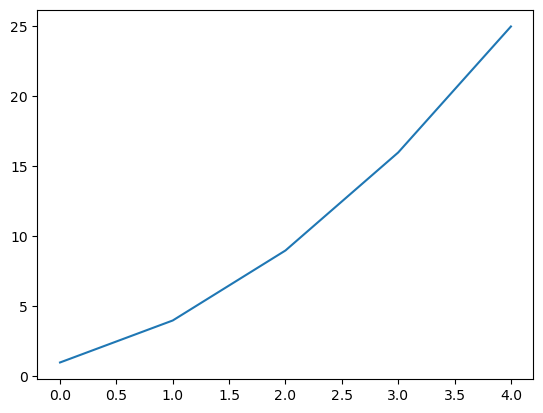

In [8]:
squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares)

plt.show()

plt라는 별칭으로 pyplot 모듈을 임포트 했으며 앞으로는 plt라는 별칭을 사용하여 그래프 작업을 수행합니다.

subplots() 함수는 같은 그림에 하나 이상의 그래프를 생성할 수 있습니다. fig 변수는 그림 전체, 혹은 생성된 그래프 컬렉션입니다. 

plt.show() 함수는 맷플롯립 뷰어를 열고 그래프를 화면에 표시합니다.

### 라벨 타입과 선 두께 바꾸기

출력된 그래프는 라벨이 너무 작고 선도 얇습니다. 옵션을 조정해서 가독성을 높이겠습니다. 

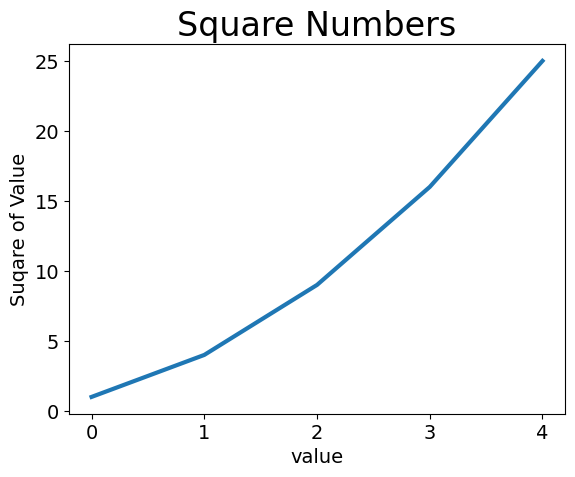

In [13]:
squares = [1, 4, 9, 16, 25]
fig, ax = plt.subplots()
ax.plot(squares, linewidth = 3)

# 차트 제목과 축 라벨을 설정
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("value", fontsize = 14)
ax.set_ylabel("Suqare of Value", fontsize = 14)
# 눈금 라벨 크기를 정합니다.
ax.tick_params(axis='both',  labelsize = 14)

plt.show()

tick_params()는 눈금 마크의 스타일을 정합니다. 여기서 사용한 매개변수는 눈금 마크를 x와 y축에 모두 사용하겠다(axis='both'), 눈금 마크의 폰트 사이즈는 14로 하겠다는 의미입니다. 

현재 그래프는 x축의 눈금 마크가 비정상 입니다. plot() 메서드에 연속된 숫자를 제공하여 이를 조정해보겠습니다.

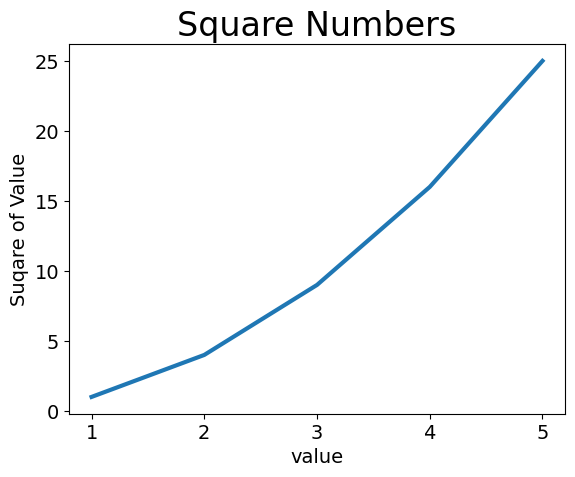

In [14]:
import matplotlib.pyplot as plt


input_values = [1, 2, 3, 4, 5]      # x 축 눈금 라벨
squares = [1, 4, 9, 16, 25]         # y 축 눈금 라벨
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth = 3)

# 차트 제목과 축 라벨을 설정
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("value", fontsize = 14)
ax.set_ylabel("Suqare of Value", fontsize = 14)
# 눈금 라벨 크기를 정합니다.
ax.tick_params(axis='both',  labelsize = 14)

plt.show()

### 내장 스타일 적용

맷플롯립에는 미리 정의된 스타일이 여러 가지 있습니다. 이 스타일에는 배경색, 눈금색, 선 두께, 폰트, 폰트 크기 등이 잘 정의되어 있어 이를 사용하면 시각화 설정에 큰 공을 들이지 않아도 보기 좋게 만들 수 있습니다. 현재 컴퓨터에서 사용할 수 있는 스타일을 보려면 셀에 다음과 같이 입력합니다.

In [15]:
import matplotlib.pyplot as plt

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

스타일을 사용하려면 그래프 생성을 시작하기 전에 한줄만 추가하면 됩니다.

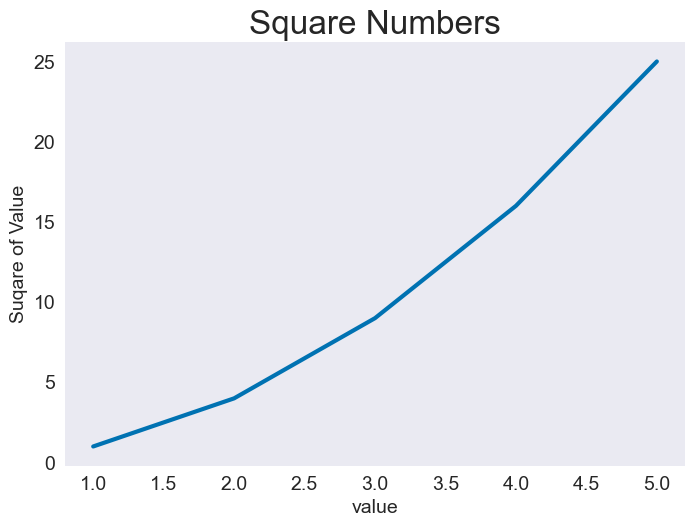

In [19]:
import matplotlib.pyplot as plt


input_values = [1, 2, 3, 4, 5]      # x 축 눈금 라벨
squares = [1, 4, 9, 16, 25] # y 축 눈금 라벨

plt.style.use('seaborn-v0_8-dark')
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth = 3)

# 차트 제목과 축 라벨을 설정
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("value", fontsize = 14)
ax.set_ylabel("Suqare of Value", fontsize = 14)
# 눈금 라벨 크기를 정합니다.
ax.tick_params(axis='both',  labelsize = 14)

plt.show()

사용할 수 있는 스타일은 다양하니, 마음에 드는 스타일을 찾아서 사용하시면 됩니다.

### scatter()를 사용하여 산포도 출력 

개별 포인트들을 그래프로 그리고 그 특징에 따라 스타일을 적용하는게 필요한 경우도 있습니다. 예를 들면 그래프에서 작은 값은 회색으로, 큰 값은 빨강색으로 표현할 수 있습니다. 

점을 그릴 때는 scatter() 메서드를 사용합니다. 그리고 싶은 (x, y) 값을 scatter()메서드에 넘기면 됩니다. 

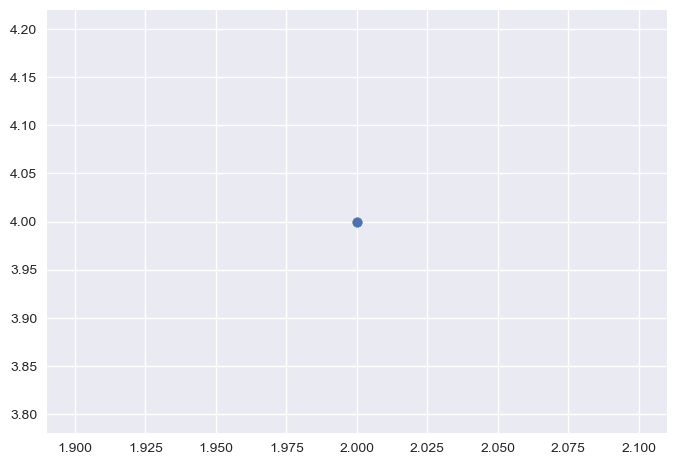

In [21]:
import matplotlib.pyplot as plt 

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(2, 4)

plt.show()

산포도를 출력할 때도 제목과 축의 라벨을 붙일 수 있고 폰트 크기도 조정이 가능합니다. 

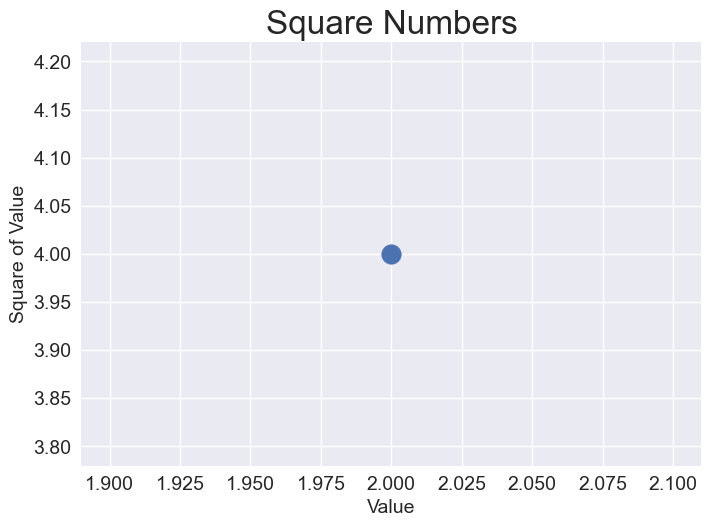

In [22]:
import matplotlib.pyplot as plt 

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(2, 4, s=200) # s: 점의 크기를 조정하는 옵션

ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize = 14)
ax.set_ylabel("Square of Value", fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize = 14)


plt.show()

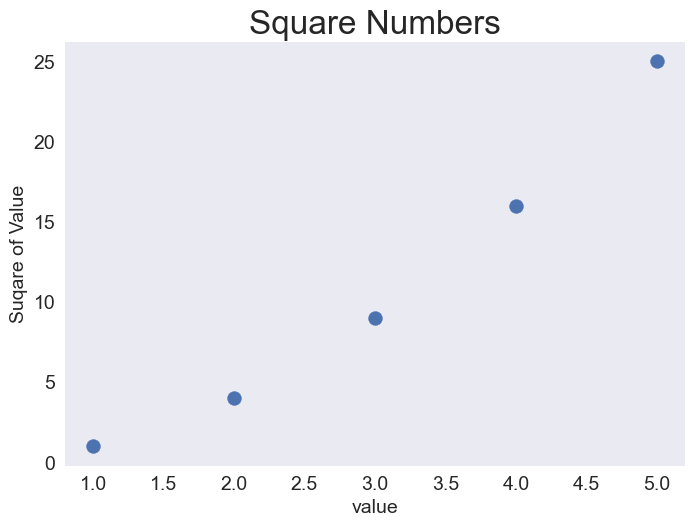

In [23]:
import matplotlib.pyplot as plt


input_values = [1, 2, 3, 4, 5]      # x 축 눈금 라벨
squares = [1, 4, 9, 16, 25] # y 축 눈금 라벨

plt.style.use('seaborn-v0_8-dark')
fig, ax = plt.subplots()
ax.scatter(input_values, squares, s=100)

# 차트 제목과 축 라벨을 설정
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("value", fontsize = 14)
ax.set_ylabel("Suqare of Value", fontsize = 14)
# 눈금 라벨 크기를 정합니다.
ax.tick_params(axis='both',  labelsize = 14)

plt.show()

scatter() 메서드를 사용하여 점을 그릴 좌표를 리스트로 주지 말고 루프를 써서 파이썬이 계산하게 하고 출력해봅니다. 

1000개의 점을 출력해보겠습니다. 

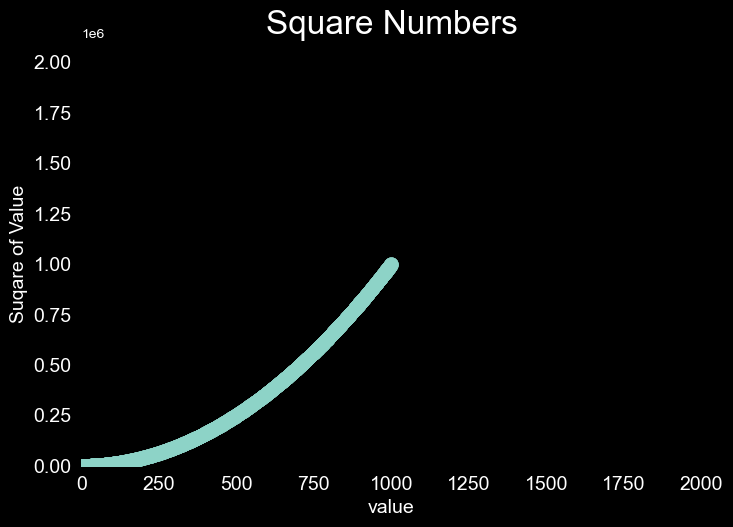

In [27]:
import matplotlib.pyplot as plt


x_values = range(1, 1001)     
y_values = [x**2 for x in x_values]

plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=100)

# 차트 제목과 축 라벨을 설정
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("value", fontsize = 14)
ax.set_ylabel("Suqare of Value", fontsize = 14)
# 눈금 라벨 크기를 정합니다.
ax.tick_params(axis='both',  labelsize = 14)
# 각 축의 범위를 정합니다. 
ax.axis([0,2000, 0, 2100000])

plt.show()